## Used to test the Bacteria Subcomponent ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from aquaponics import Aquaponics

## No Nitrogen Added / Removed ##

In [2]:
a = Aquaponics('bacteria', NH3_0=6, NO3_0=0.1, T=29.3, Cm_0=.6, Cb_0=.01)
m = a.get_model()

tf = 15
steps = tf * 10 + 1
m.time = np.linspace(0,tf,steps)
m.options.IMODE = 4

start = time.time()
a.solve(glamdring=True, disp=False)
print('Solved in {:.3f} Seconds'.format(time.time() - start))

Solved in 3.974 Seconds


Text(0.5,0,'Time (days)')

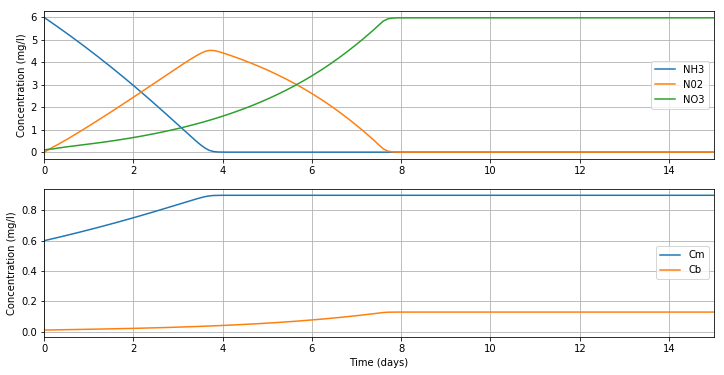

In [3]:
%matplotlib inline
plt.figure(figsize=(12,6))
ax = plt.subplot(211)
plt.plot(m.time, a.NH3, label='NH3')
plt.plot(m.time, a.NO2, label='N02')
plt.plot(m.time, a.NO3, label='NO3')
plt.grid()
plt.legend()
plt.ylabel('Concentration (mg/l)')

ax = plt.subplot(212, sharex=ax)
plt.plot(m.time, a.Cm, label='Cm')
plt.plot(m.time, a.Cb, label='Cb')
plt.grid()
plt.legend()
plt.ylabel('Concentration (mg/l)')

plt.xlim(0, tf)
plt.xlabel('Time (days)')

## Nitrogen Added ##

In [4]:
a = Aquaponics('bacteria', NH3_0=6, NO3_0=0.1, T=29.3, Cm_0=.6, Cb_0=.01)
m = a.get_model()
tf = 15
steps = tf * 10 + 1
m.time = np.linspace(0,tf,steps)

N_added = np.zeros(steps)
N_added[list(m.time).index(10):] = 3   # Add 3 more mg at time 10
a.NH3_exc.value = N_added

m.options.IMODE = 4

a.solve(glamdring=True, disp=False)

Text(0.5,0,'Time (days)')

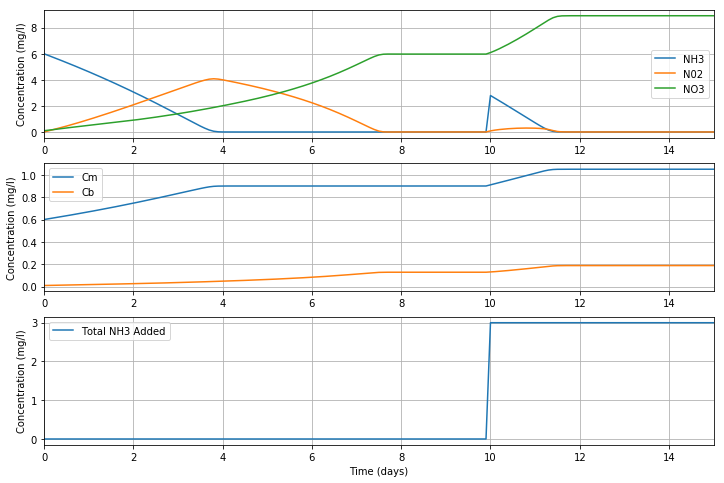

In [5]:
%matplotlib inline
plt.figure(figsize=(12,8))
ax = plt.subplot(311)
plt.plot(m.time, a.NH3, label='NH3')
plt.plot(m.time, a.NO2, label='N02')
plt.plot(m.time, a.NO3, label='NO3')
plt.grid()
plt.legend()
plt.ylabel('Concentration (mg/l)')

ax = plt.subplot(312, sharex=ax)
plt.plot(m.time, a.Cm, label='Cm')
plt.plot(m.time, a.Cb, label='Cb')
plt.grid()
plt.legend()
plt.ylabel('Concentration (mg/l)')

ax = plt.subplot(313, sharex=ax)
plt.plot(m.time, a.NH3_exc, label='Total NH3 Added')
plt.grid()
plt.legend()
plt.ylabel('Concentration (mg/l)')

plt.xlim(0, tf)
plt.xlabel('Time (days)')

## With Uptake ##

In [6]:
a = Aquaponics('bacteria', NH3_0=6, NO3_0=0.1, T=29.3, Cm_0=.6, Cb_0=.01)
m = a.get_model()
tf = 15
steps = tf * 10 + 1
m.time = np.linspace(0,tf,steps)

N_added = np.zeros(steps)
N_added[list(m.time).index(10):] = 3   # Add 3 more mg at time 10
a.NH3_exc.value = N_added

t12 = list(m.time).index(12)
N_uptake = np.zeros(steps)
N_uptake[t12:] = np.linspace(0, 6, len(N_uptake[t12:]))  # Total of 6 uptake from t = 12 to t = 20
a.NO3_up.value = N_uptake

m.options.IMODE = 4

a.solve(glamdring=True, disp=False)

Text(0.5,0,'Time (days)')

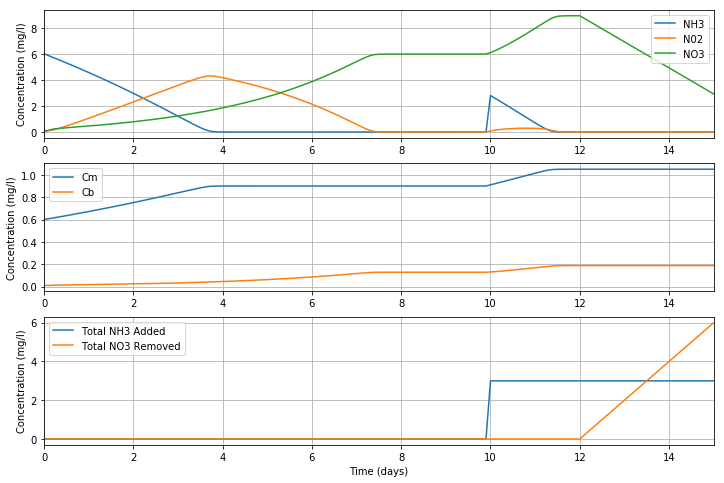

In [7]:
%matplotlib inline
plt.figure(figsize=(12,8))
ax = plt.subplot(311)
plt.plot(m.time, a.NH3, label='NH3')
plt.plot(m.time, a.NO2, label='N02')
plt.plot(m.time, a.NO3, label='NO3')
plt.grid()
plt.legend()
plt.ylabel('Concentration (mg/l)')

ax = plt.subplot(312, sharex=ax)
plt.plot(m.time, a.Cm, label='Cm')
plt.plot(m.time, a.Cb, label='Cb')
plt.grid()
plt.legend()
plt.ylabel('Concentration (mg/l)')

ax = plt.subplot(313, sharex=ax)
plt.plot(m.time, a.NH3_exc, label='Total NH3 Added')
plt.plot(m.time, a.NO3_up, label='Total NO3 Removed')
plt.grid()
plt.legend()
plt.ylabel('Concentration (mg/l)')

plt.xlim(0, tf)
plt.xlabel('Time (days)')